# 🧠 Brain Size and Head Size: A Simple Linear Regression Analysis


## 📘 Introduction

This project investigates the relationship between head size and brain weight in healthy adult humans. Utilizing a dataset of 237 individuals from post-mortem examinations at Middlesex Hospital in London (circa 1905), we aim to determine if head size can predict brain weight through simple linear regression analysis.

**Objectives:**
- Identify independent (head size) and dependent (brain weight) variables.
- Visualize the relationship between variables.
- Calculate and interpret the correlation coefficient.
- Develop and interpret a linear regression model.
- Make predictions and analyze residuals.


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'
df = pd.read_csv(data_url)

# Display the first few rows
df.head()


,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# Check for missing values
num_null = df.isnull().sum().sum()
print(f"Total missing values in the dataset: {num_null}")


Total missing values in the dataset: 0


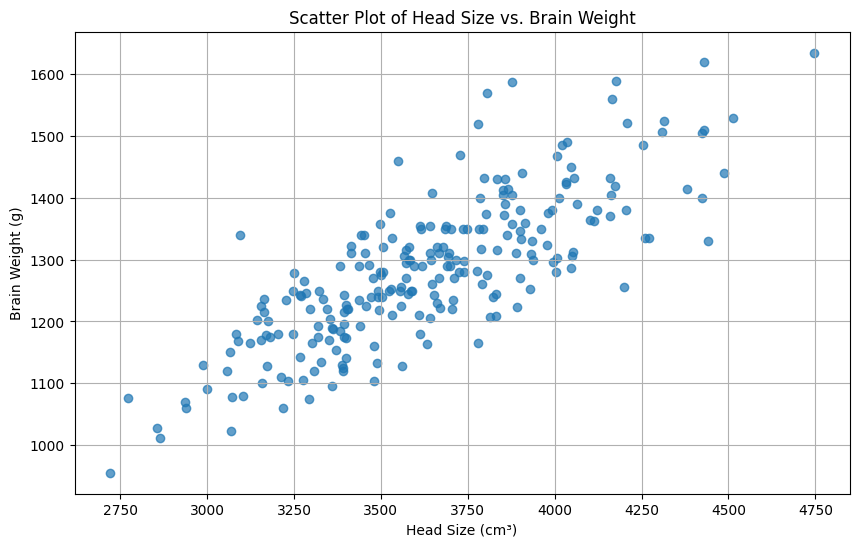

In [3]:
# The scatter plot suggests a positive linear relationship between head size and brain weight.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Head'], df['Brain'], alpha=0.7)
plt.title('Scatter Plot of Head Size vs. Brain Weight')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (g)')
plt.grid(True)
plt.show()


In [4]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
r, p_value = pearsonr(df['Head'], df['Brain'])
print(f"Correlation coefficient: {r:.3f}")
print(f"P-value: {p_value:.3e}")


Correlation coefficient: 0.800
P-value: 5.958e-54


In [5]:
# A correlation coefficient of approximately 0.8 indicates a strong positive linear relationship between head size and brain weight.

import statsmodels.api as sm

# Define independent and dependent variables
X = df['Head']
y = df['Brain']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Build the OLS model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Mon, 05 May 2025   Prob (F-statistic):           5.96e-54
Time:                        18:43:12   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        325.5734     47.141      6.906      0.0

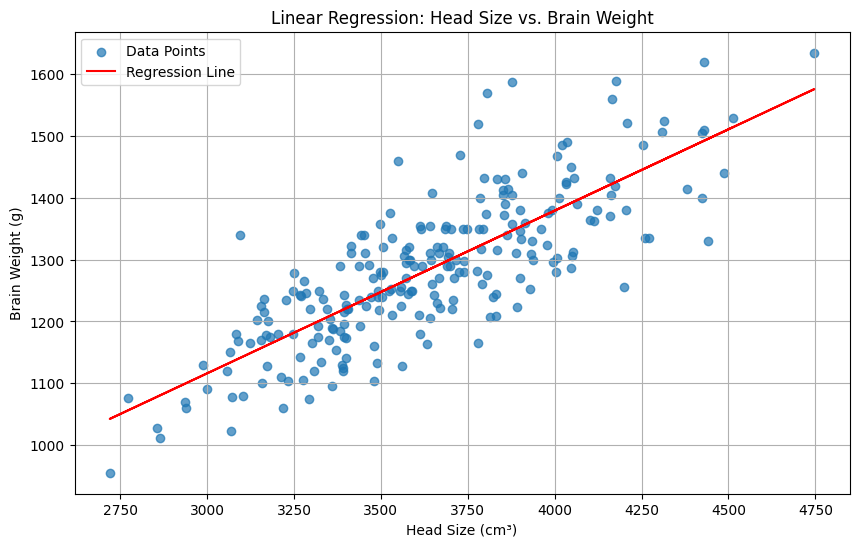

In [6]:
# The regression line fits the data well, reinforcing the strong linear relationship observed earlier.

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['Head'], df['Brain'], alpha=0.7, label='Data Points')
plt.plot(df['Head'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Head Size vs. Brain Weight')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (g)')
plt.legend()
plt.grid(True)
plt.show()


Brain Weight = Intercept + (Slope × Head Size)

For every additional cubic centimeter in head size, brain weight increases by approximately 0.263 grams.


In [9]:
# Predict brain weight for a head size of 4100 cm³
head_size = 4100
predicted_brain_weight = model.predict([1, head_size])[0]
print(f"Predicted brain weight for head size {head_size} cm³: {predicted_brain_weight:.2f} g")


Predicted brain weight for head size 4100 cm³: 1405.63 g


In [8]:
# Calculate residuals
df['Predicted_Brain'] = model.predict(X)
df['Residuals'] = df['Brain'] - df['Predicted_Brain']

# Display the first few residuals
df[['Brain', 'Predicted_Brain', 'Residuals']].head()


,Brain,Predicted_Brain,Residuals
0,1530,1514.166601,15.833399
1,1297,1310.272292,-13.272292
2,1335,1448.045837,-113.045837
3,1282,1320.546036,-38.546036
4,1590,1425.917772,164.082228


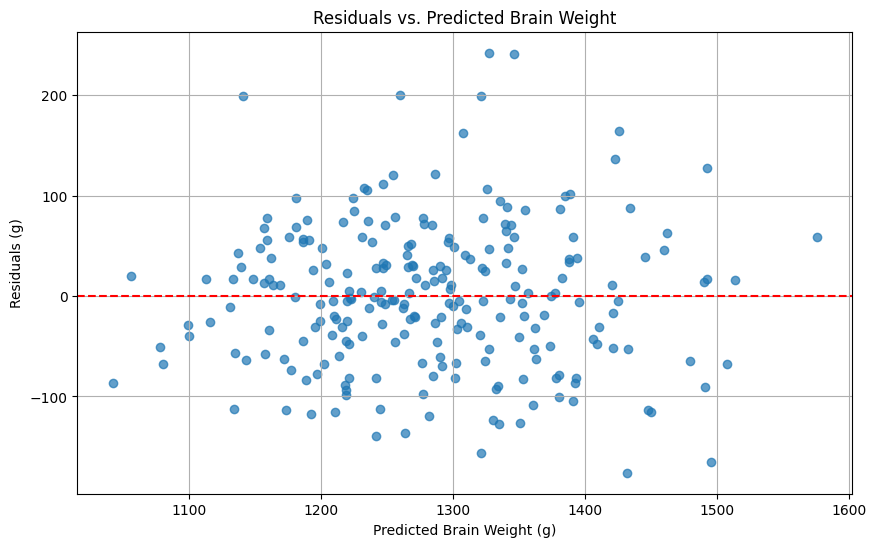

In [10]:
# The residuals are randomly dispersed around zero, indicating a good fit for the linear regression model.


# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(df['Predicted_Brain'], df['Residuals'], alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Brain Weight')
plt.xlabel('Predicted Brain Weight (g)')
plt.ylabel('Residuals (g)')
plt.grid(True)
plt.show()

